<a href="https://colab.research.google.com/github/Amit-Singh-Rajput/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.**

**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors. 

## **Data Description**

**Demographic:**

- **Sex:** male or female("M" or "F")
- **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

- **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")
- **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
- **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
- **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
- **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
- **Diabetes:** whether or not the patient had diabetes (Nominal)

**Medical(current)**
- **Tot Chol:** total cholesterol level (Continuous)
- **Sys BP:** systolic blood pressure (Continuous)
- **Dia BP:** diastolic blood pressure (Continuous)
- **BMI:** Body Mass Index (Continuous)
- **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- **Glucose:** glucose level (Continuous)

**Predict variable (desired target)**
- **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) - DV

# **Importing Required Libraries**

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For Handling Warnings
import warnings
warnings.filterwarnings('ignore')

**Mounting Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Reading csv file
cardio_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Projects/Cardiovascular Supervised ML Classification - Amit Singh Rajput/data_cardiovascular_risk.csv')

# **Exploring Dataset**

In [4]:
#Checking first 5 rows of dataset
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#Checking bottom 5 rows of dataset
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#Checking Shape of Dataset
cardio_df.shape

(3390, 17)

In [7]:
#Printing the attributes
print("Features of the dataset: ")
cardio_df.columns

Features of the dataset: 


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
#Understanding the datatype of each attribute
cardio_df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [9]:
#Detailed information about dataset
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [10]:
#Finding total number of unique values of feature
cardio_df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [11]:
#Checking the statistical description of the dataset
cardio_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [12]:
#Creating copy of dataset before working with it so that original data remains untouched
df = cardio_df.copy()

# **Handling Missing Values**

In [13]:
#Checking for Null Values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

From above we can see that we have missing values in our dataset.

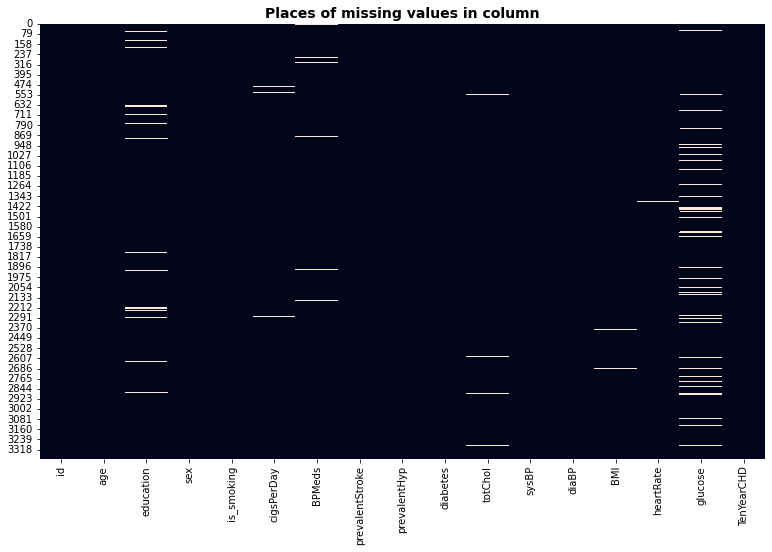

In [14]:
#Checking for missing values in our dataset with the help of heatmap.
plt.figure(figsize = (13,8))
sns.heatmap(df.isna(), cbar=False)
plt.title('Places of missing values in column',weight = 'bold', fontsize = 14)
plt.show()

In [15]:
#Percentage of missing data per category
Total_missing_data = df.isna().sum().sort_values(ascending = False)
Total_percentage = (df.isna().sum() / df.isna().count()).sort_values(ascending = False) * 100
missing_data_concat = pd.concat([Total_missing_data, round((Total_percentage),2)], axis = 1, keys = ["Total No of Missing Values", "Percentage of Missing Values"])
missing_data = missing_data_concat[missing_data_concat['Total No of Missing Values']>0]
missing_data

,Total No of Missing Values,Percentage of Missing Values
glucose,304,8.97
education,87,2.57
BPMeds,44,1.30
totChol,38,1.12
cigsPerDay,22,0.65
BMI,14,0.41
heartRate,1,0.03


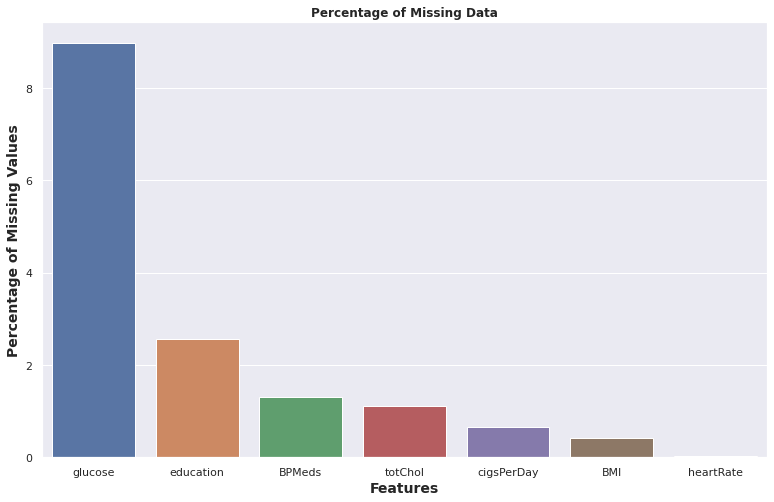

In [16]:
plt.figure(figsize = (13,8))
sns.set(style = 'darkgrid')
sns.barplot(x = missing_data.index, y = missing_data['Percentage of Missing Values'], data = missing_data)
plt.title('Percentage of Missing Data', weight = 'bold')
plt.xlabel('Features', fontsize = 14, weight = 'bold')
plt.ylabel('Percentage of Missing Values', fontsize = 14, weight = 'bold')
plt.show();

In [17]:
#Total Number of Null Values
print("Total number of null values in the data set : "  , df.isna().sum().sum())

#Counting all the rows which contain missing values
count = 0
for i in df.isna().sum(axis = 1) :
  if i>0 :
    count = count + 1
print('Total number of rows with missing values is ', count)
print(f'Percentage of rows which are having missing values in the entire datset : {round((count/ len(df.index))*100, 2)} %')

Total number of null values in the data set :  510
Total number of rows with missing values is  463
Percentage of rows which are having missing values in the entire datset : 13.66 %


**Replacing the missing values in the categorical columns with its mode**

In [18]:
#Replacing the missing values in the categorical columns with its mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [19]:
#Checking for the missing values in the categorical columns
print("Total missing values in column 'Education' after Mode imputation : ", df['education'].isna().sum())
print("Total missing values in column 'BPMeds' after Mode imputation : ", df['BPMeds'].isna().sum())

Total missing values in column 'Education' after Mode imputation :  0
Total missing values in column 'BPMeds' after Mode imputation :  0


**Checking the distributions of the continuous variables and impute the missing values with mean or median**

In [20]:
#Assigning the variable names containing missing values
missing_cont_var = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate' ]

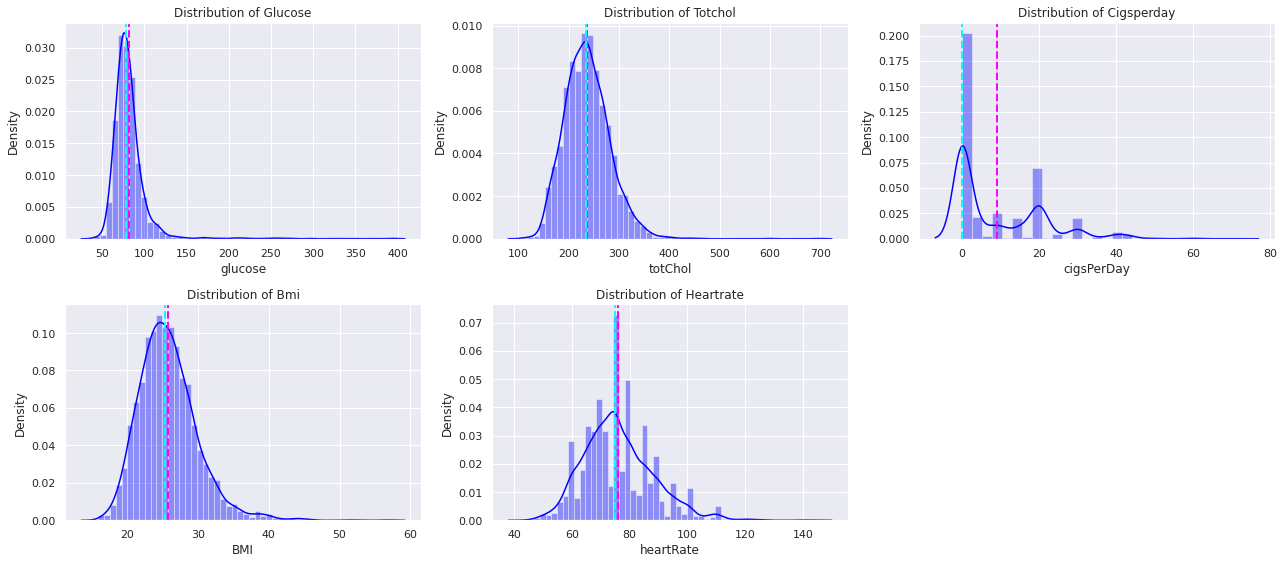

In [21]:
#Visualizing the distribution plot of variables which contains missing values
fig = plt.figure(figsize = (18,8))
for index,column in enumerate(missing_cont_var) :
  plt.subplot(2,3,index+1)
  sns.distplot(df[column], color = 'blue')
  feature = df[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(f'Distribution of {column.title()}')
  plt.tight_layout()

**Observation**

As we can see from above that almost all the plots are skewed, so it would be better if we impute missing values with the help of median.

In [22]:
#Replacing the missing values with the help of median
for column in missing_cont_var :
  df[column] = df[column].fillna(df[column].median())

In [23]:
#Let's check for missing values
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Observation**

As we can see we have successfully handled all the missing values in the dataset

### **Duplicate Values**

In [24]:
#Checking if any duplicate is present
df.duplicated().sum()

0

**Observation**

As can be seen above that there is no duplicate value present in our dataset.

**Dropping the 'ID' column as we won't be using it in our analysis.**

In [25]:
#Dropping the 'ID' column 
df.drop(columns = ['id'], inplace = True)

# **Exploratory Data Analysis**

In [26]:
# Checking the distribution of Target Variable/dependent variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

- 1 = Patient having the risk of coronary heart disease
- 0 = Patient does not have the risk of coronary heart disease

There are 2879 patients without heart disease and 511 patients with heart disease.

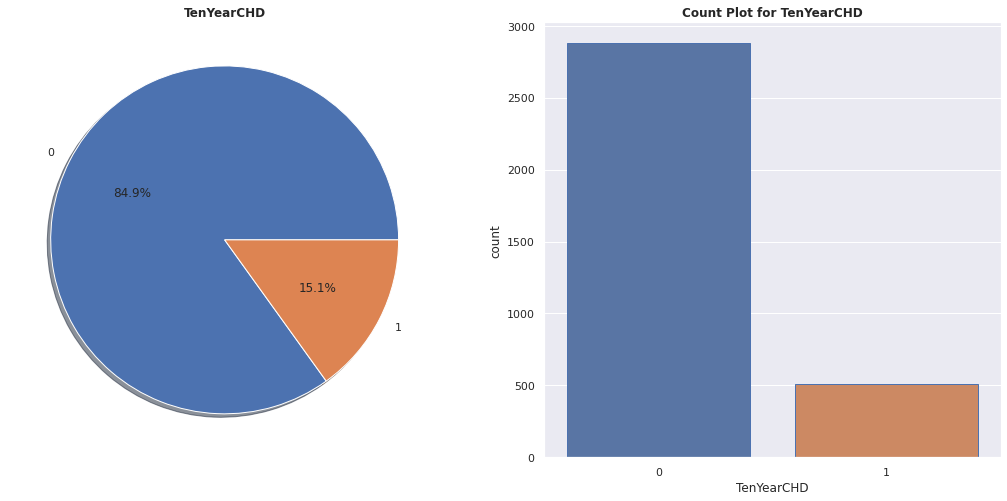

In [27]:
#visualizing the Target variable
fig,axes = plt.subplots(1,2, figsize = (18,8))
df['TenYearCHD'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[0], shadow = True)
sns.countplot('TenYearCHD', data = df, ax = axes[1], edgecolor = 'b')
axes[0].set_title('TenYearCHD', weight = 'bold')
axes[0].set_ylabel('')
axes[1].set_title('Count Plot for TenYearCHD', weight = 'bold')
plt.show()

**Observation**

We can see above that we have an imbalanced data set as the number of people without the disease greatly exceeds the number of people with the disease.

# **Handling Outliers**

In [28]:
#Creating variables containing 'Categorical' and 'Numerical' features
Categorical_features = [i for i in df.columns if df[i].nunique() <= 4]
Numerical_features = [i for i in df.columns if df[i].nunique() > 4 ]

print(f'categorical features are : {Categorical_features}')
print(f'Numerical features are : {Numerical_features}')

categorical features are : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Numerical features are : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


## **Distribution of the Continuous independent features**

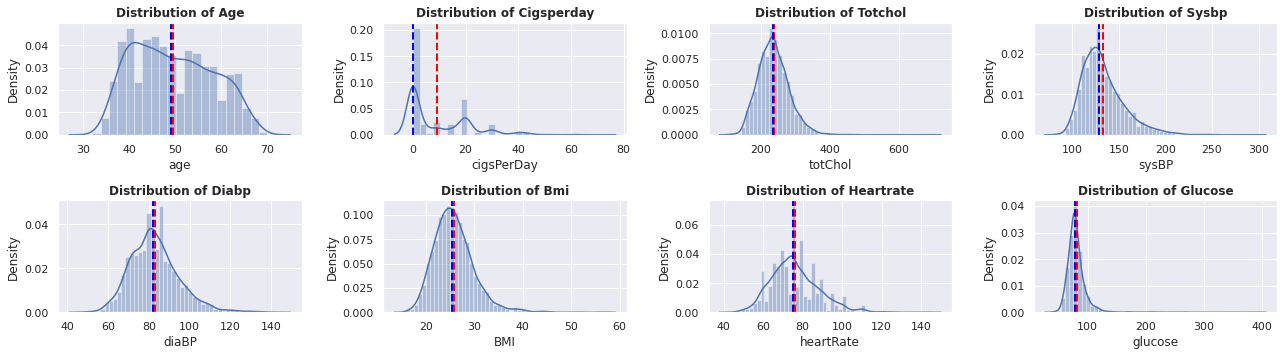

In [29]:
#Visualizing the distribution of the numerical features from the dataset.
plt.figure(figsize=(18,12))
for index, column in enumerate(Numerical_features):
  plt.subplot(5, 4, index+1)
  sns.distplot(df[column])
  plt.axvline(df[column].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
  plt.axvline(df[column].median(), color = 'blue', linestyle = 'dashed', linewidth =2)
  plt.title(f'Distribution of {column.title()}', weight = 'bold')
  plt.tight_layout()

**Observation**

As we can see from the above plots that some of the variable are having skewed distribution , outliers needed to be treated for better analysis.

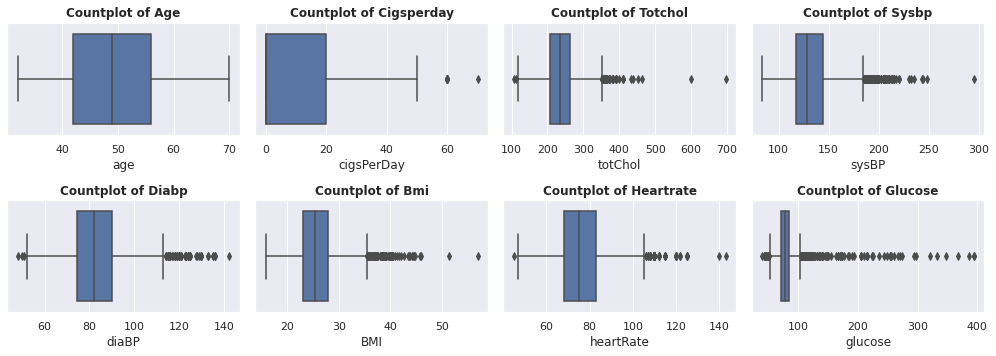

In [30]:
#Analyzing outliers of the Numerical features with the help of box plot
plt.figure(figsize = (14,12))
for index, column in enumerate(Numerical_features) :
  plt.subplot(5, 4, index+1)
  sns.boxplot(df[column])
  plt.title (f'Countplot of {column.title()}', weight = 'bold')
  plt.tight_layout()
plt.show();

**Observation**

As we can see from the above plots that there are outliers in our dataset, so we need to remove them

In [31]:
#Removing outliers by standard methods
cvdf = df.copy()
for column in Numerical_features :
  q1, q3, median = cvdf[column].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5 * (q3 - q1)
  upper_limit = q3 + 1.5 * (q3 - q1)

# Replacing outliers with median value
  cvdf[column] = np.where (cvdf[column] > upper_limit, median, 
                            np.where(cvdf[column] < lower_limit , median, cvdf[column]))

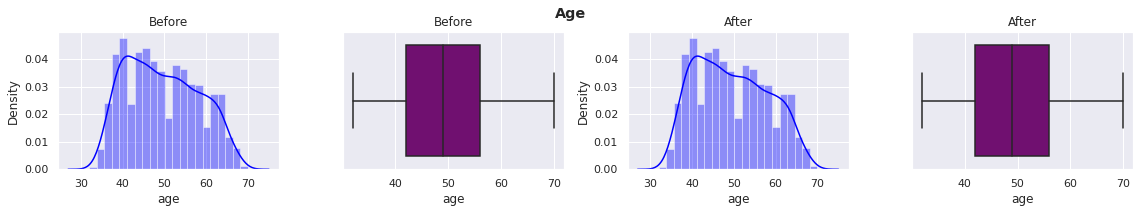

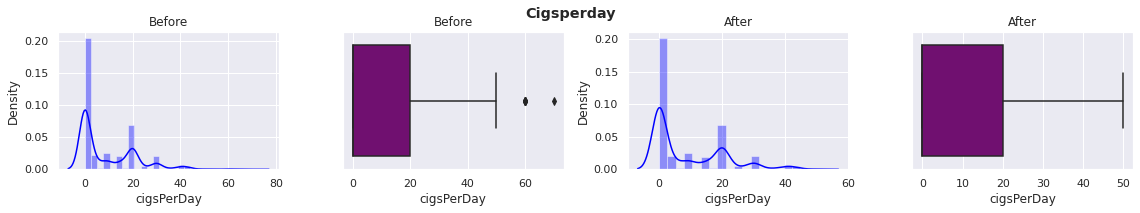

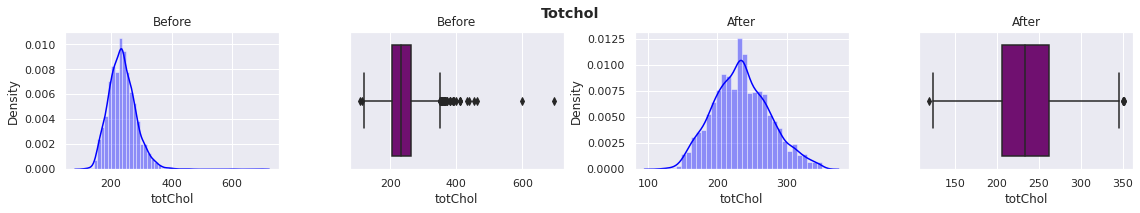

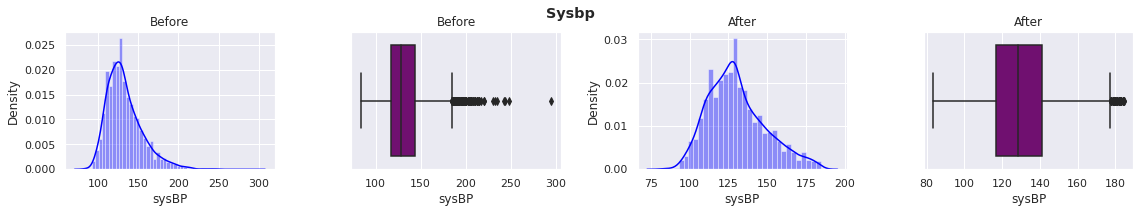

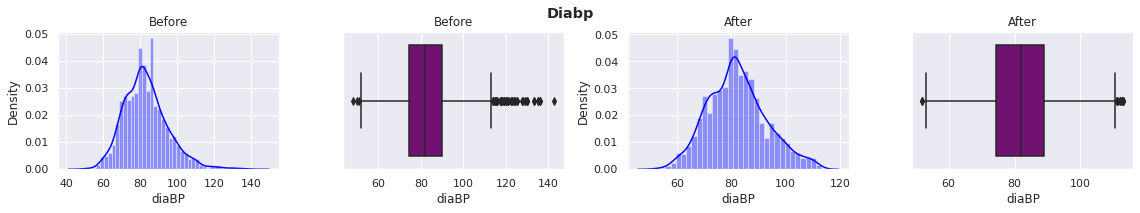

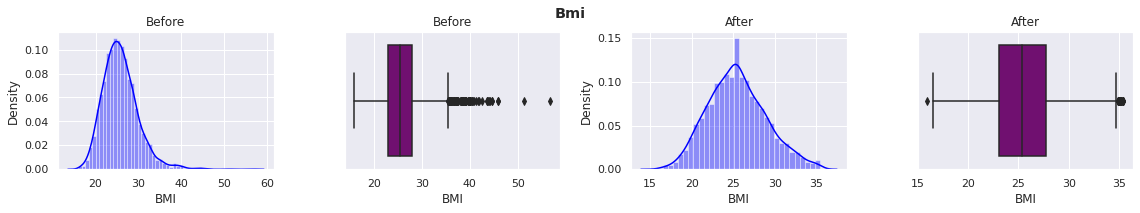

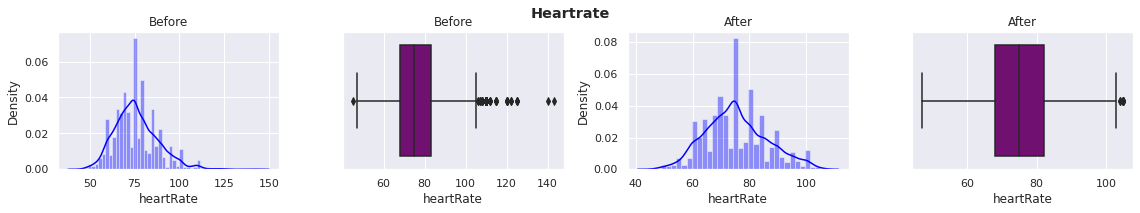

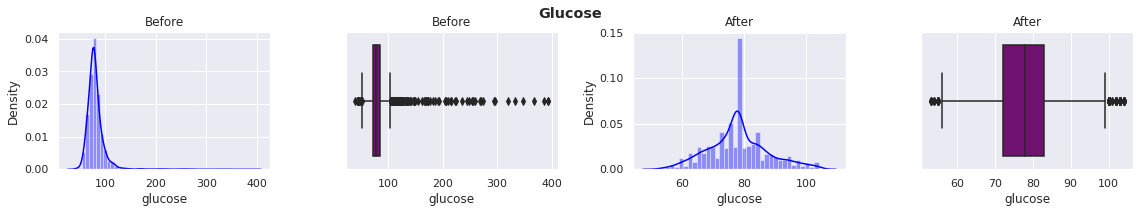

In [32]:
#Plotting graphs before and after the outlier treatment
for column in Numerical_features :
  fig, axes = plt.subplots(1, 4, figsize= (16,3) )
  sns.distplot(df[column], ax = axes[0], color = 'blue').set(title = 'Before')
  sns.boxplot(df[column], ax = axes[1], color = 'purple').set(title = 'Before')
  sns.distplot(cvdf[column], ax = axes[2], color = 'blue').set(title = 'After')
  sns.boxplot(cvdf[column], ax = axes[3], color = 'purple').set(title = 'After')
  plt.suptitle(f'{column.title()}',weight='bold')
  plt.tight_layout()
  fig.show()

**Observation**

As we can see from above that we have successfully treated the outliers in the numerical features.

## **Distribution of the Categorical independent features**

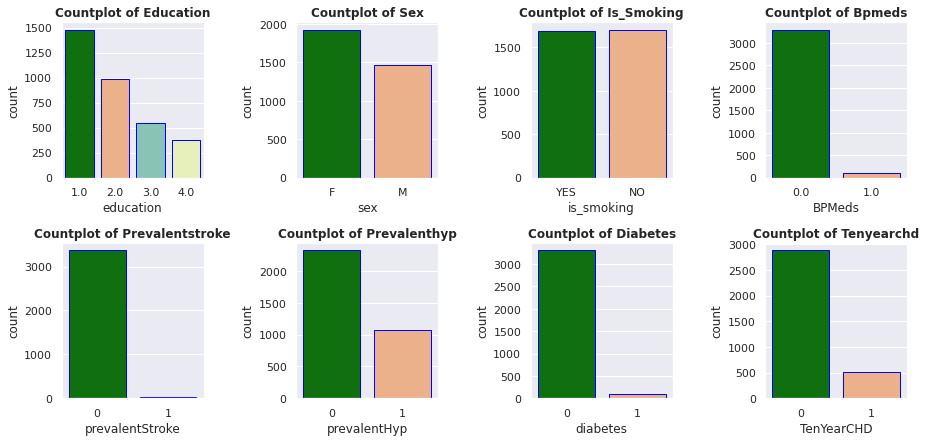

In [33]:
plt.figure(figsize=(13,15))
for index,column in enumerate(Categorical_features):
  plt.subplot(5, 4, index+1)
  sns.countplot( cvdf[column], edgecolor = 'blue',palette = ["green","#FAAE7B","#7fcdbb","#edf8b1"])
  plt.title (f'Countplot of {column.title()}', weight = 'bold')
  plt.tight_layout()

## **Converting categorical variables to numerical variables - 'Label Encoding'**

In [34]:
#Defining Label encoder based on categorical column 'sex', 'is_smoking'
label_encoding = {'sex' : {'M': 1, 'F': 0}, 'is_smoking' : {'YES' : 1, 'NO' : 0}}
cvdf = cvdf.replace(label_encoding)

In [35]:
#Let's check the datatype of different features
cvdf.dtypes.reset_index().rename(columns = {'index' : 'Feature', 0 :'Datatype'})

,Feature,Datatype
0,age,float64
1,education,float64
2,sex,int64
3,is_smoking,int64
4,cigsPerDay,float64
5,BPMeds,float64
6,prevalentStroke,int64
7,prevalentHyp,int64
8,diabetes,int64
9,totChol,float64


**Observation**

As it can be seen from above that all the features of the dataset has been converted to 'int' or 'float' type.

## **Univariate Analysis**

In [36]:
#Assigning all the columns in one variable 
independent_variable = cvdf.columns

In [37]:
#Checking the value counts of categorical features
for i in Categorical_features :
  print('\n')
  print(f'Value count for the feature : {i}')
  print (cvdf[i].value_counts())



Value count for the feature : education
1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64


Value count for the feature : sex
0    1923
1    1467
Name: sex, dtype: int64


Value count for the feature : is_smoking
0    1703
1    1687
Name: is_smoking, dtype: int64


Value count for the feature : BPMeds
0.0    3290
1.0     100
Name: BPMeds, dtype: int64


Value count for the feature : prevalentStroke
0    3368
1      22
Name: prevalentStroke, dtype: int64


Value count for the feature : prevalentHyp
0    2321
1    1069
Name: prevalentHyp, dtype: int64


Value count for the feature : diabetes
0    3303
1      87
Name: diabetes, dtype: int64


Value count for the feature : TenYearCHD
0    2879
1     511
Name: TenYearCHD, dtype: int64


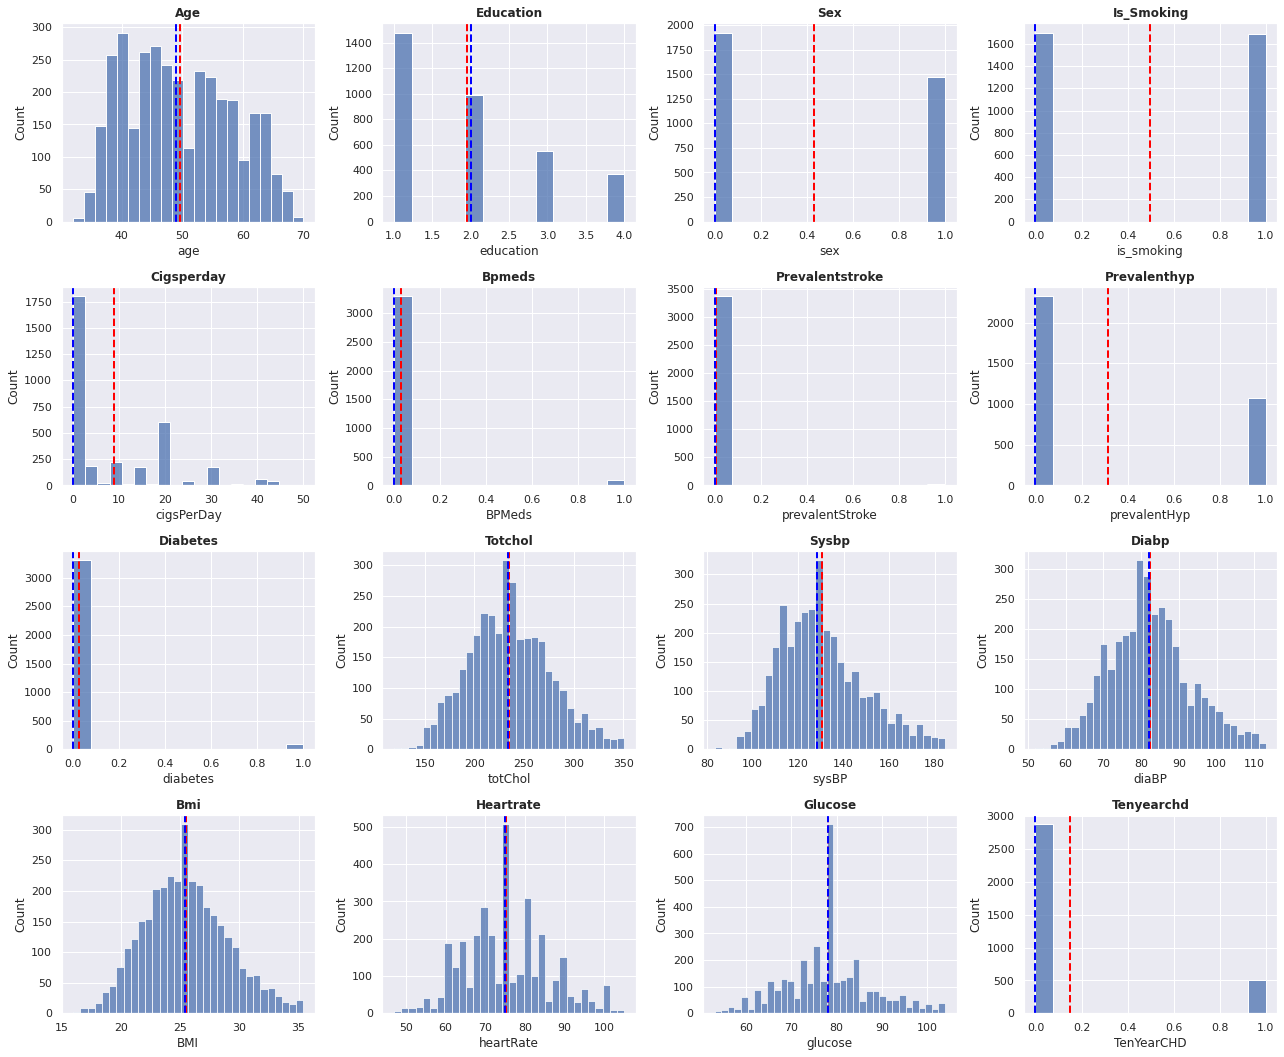

In [38]:
# Let's see the histplots of different columns in our dataset
plt.figure(figsize = (18,18))
for index, column in enumerate(independent_variable):
  feature = cvdf[column]
  ax = plt.subplot(5,4,index+1)
  sns.histplot(feature)
  plt.axvline(cvdf[column].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
  plt.axvline(cvdf[column].median(), color = 'blue', linestyle = 'dashed', linewidth =2)
  plt.title(f'{column.title()}', weight = 'bold')
  plt.tight_layout()

**Observation**

- The majority of the patients belong to education level 1.
- There is more female patient compared to male in our dataset.
- There is an almost equal number of smokers and non smokers in our dataset.
- Most of the people in the dataset are around 40 to 50 years old.
- Most of the patient smoke less than 10 Cigarettes a day.
- 100 Patient in the dataset is on blood pressure medication
- Only 22 patients in the dataset have encountered prevalent stroke.
- 1069 patients in the dataset have experienced prevalent hypertension.
- Only 87 patients have Diabetes.
- 'Total cholesterol', 'systolic blood pressure, 'diastolic blood pressure, 'BMI', 'Heartrate', 'Glucose' - these features appear normally distributed.

## **Bivariate Analysis**

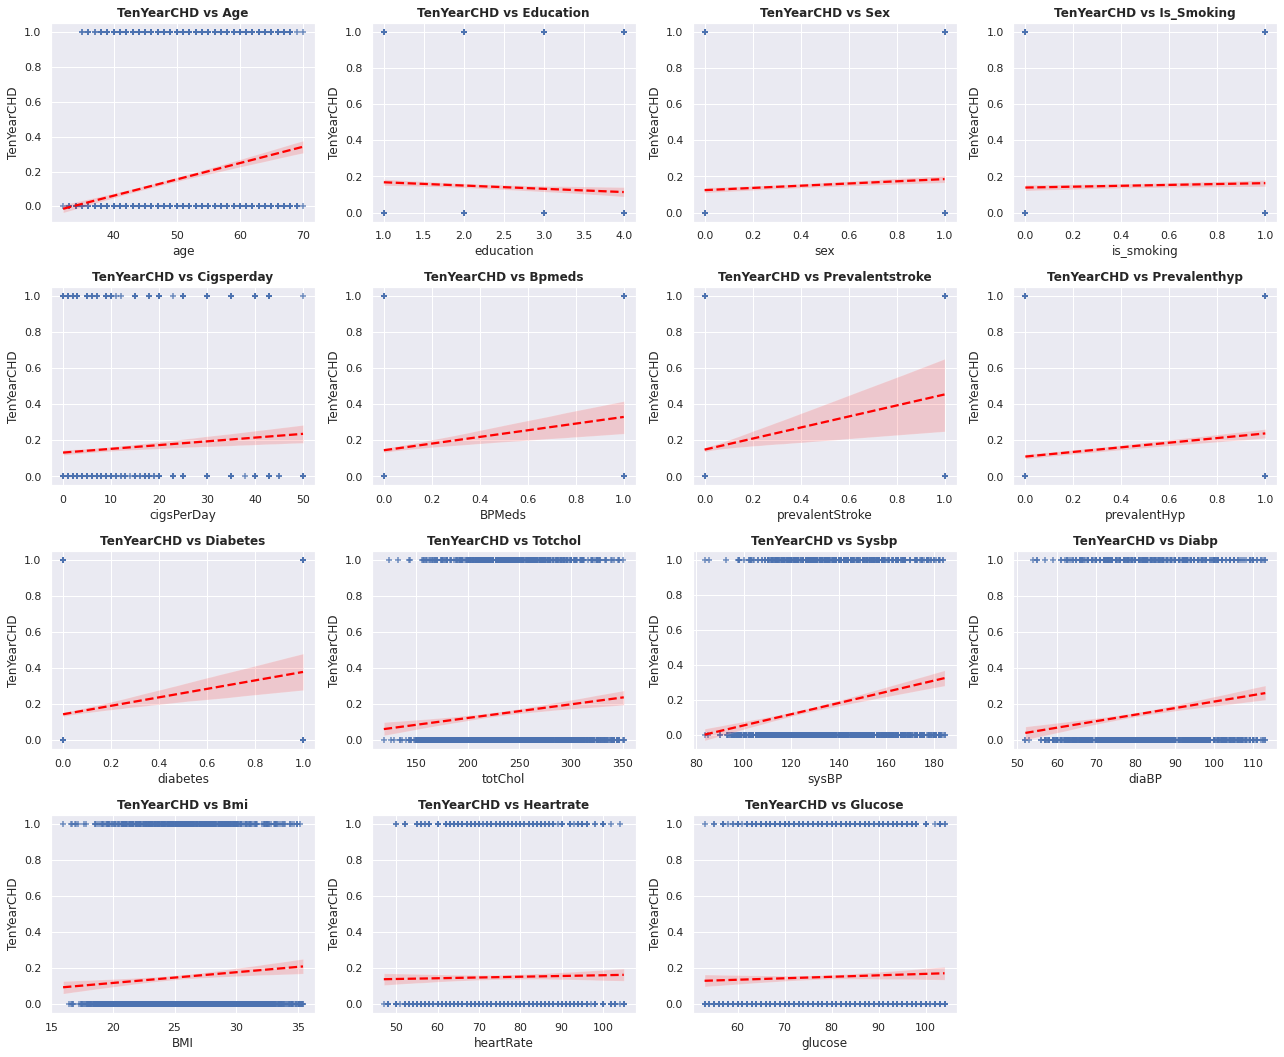

In [39]:
# Let's check linearity between our dependent and independent variable.
variables = [i for i in independent_variable if i not in ['TenYearCHD']]

plt.figure(figsize = (18,18))
for index, column in enumerate(variables) :
  plt.subplot(5,4,index+1)
  sns.regplot(data = cvdf, x = column, y = 'TenYearCHD', marker = '+' , line_kws = {'color' : 'red', 'linestyle':'--'})
  plt.title(f'TenYearCHD vs {column.title()}', weight = 'bold')
  plt.tight_layout()
plt.show()

**Observation**

- Age is positively correlated with the risk of heart disease, if the age of a person increases then the risk of coronary heart disease increases.
- Females are less prone to heart disease, if the patient is male there is more chance of heart disease.
- If the consumption of cigarettes per day increases then also there is a higher risk of heart disease.
- If patients have a history of BP Medication then also the risk of heart disease increases.
- If patients have a history of Prevalent Stroke, Prevalent Hypertension, Diabetes, High cholesterol, High systolic blood pressure, and High diastolic blood pressure then the risk of heart disease increases.
- Patients with high BMI are prone to heart disease risk.

# **Checking Multicollinearity**

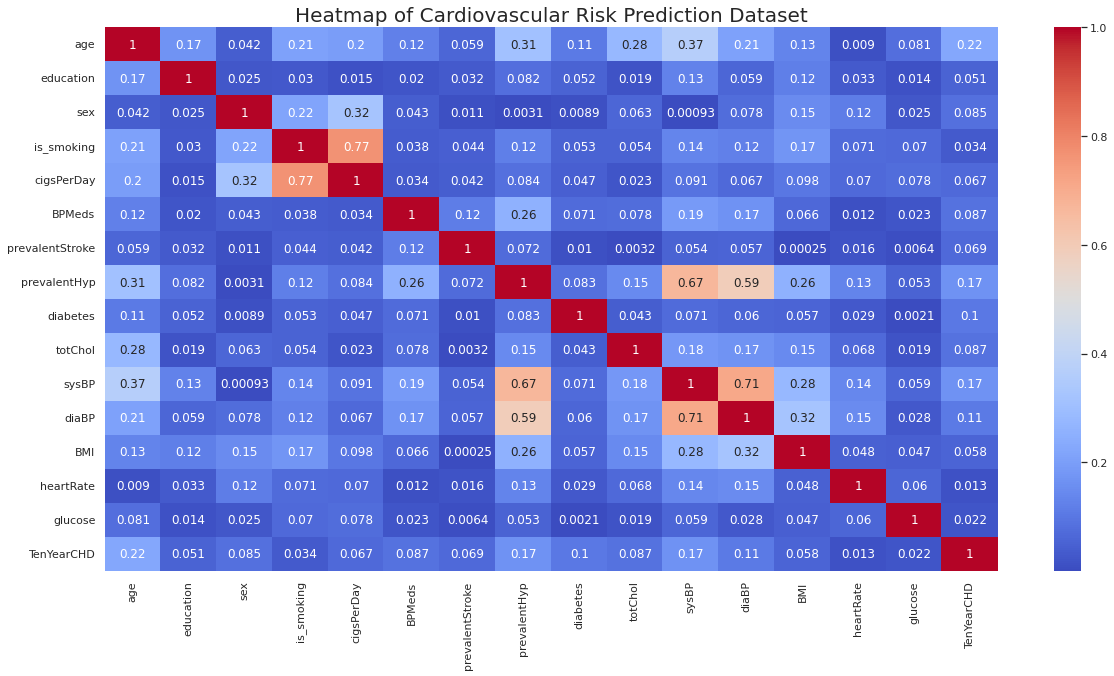

In [40]:
#Checking Correlation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(abs(cvdf.corr()), annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Cardiovascular Risk Prediction Dataset",  fontsize  = 20)
plt.show()

**Observation**

From above we can see that there are highly correlated features present like is_smoking and cigarettes per day and Systolic Blood Pressure and diastolic blood pressure are highly correlated with prevalent hypertension, let's treat them by checking multicollinearity between different independent variables with the help of variance inflation factor.

In [41]:
#Defining function to calculate Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    #Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif.sort_values(by= 'VIF', ascending = False))

In [42]:
#Checking VIF 
independent_variables = [i for i in cvdf.columns if i not in ['TenYearCHD']]
calculate_vif(cvdf[independent_variables])

,variables,VIF
10,sysBP,132.655302
11,diaBP,127.212212
12,BMI,58.866609
14,glucose,55.671761
13,heartRate,47.789265
0,age,42.772276
9,totChol,37.653008
3,is_smoking,4.954371
1,education,4.649621
4,cigsPerDay,4.194075


**Observation**

From above it can be seen that the VIF values for various variables are very high, let's not consider them for further analysis.

In [43]:
#Checking rectified VIF 
calculate_vif(cvdf[[i for i in cvdf.columns if i not in ['TenYearCHD','diaBP','sysBP', 'glucose', 'BMI', 'totChol','is_smoking', 'heartRate']]])

,variables,VIF
0,age,5.381373
1,education,3.965520
2,sex,1.966446
3,cigsPerDay,1.734502
6,prevalentHyp,1.685134
4,BPMeds,1.120404
7,diabetes,1.044744
5,prevalentStroke,1.024797


**Observation**

The threshold values for VIF we had set as 5, as we can see from above the target is achieved.

In [44]:
#Updating the new independent variables 
independent_variables = [i for i in cvdf.columns if i not in ['TenYearCHD','diaBP','sysBP', 'glucose', 'BMI', 'totChol','is_smoking', 'heartRate']]

#Updating the dataset
updated_cvdf = cvdf[independent_variables + ['TenYearCHD']]

In [45]:
#Checking columns of the dataset
updated_cvdf.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD'],
      dtype='object')

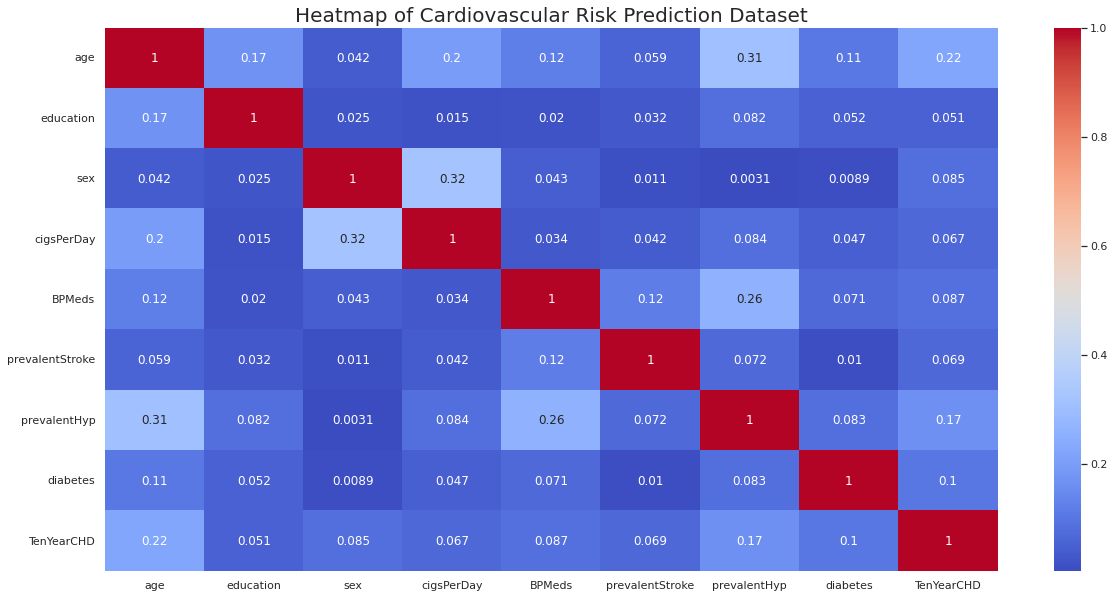

In [46]:
#Checking Correlation Heatmap with updated dataset
plt.figure(figsize = (20,10))
sns.heatmap(abs(updated_cvdf.corr()), annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Cardiovascular Risk Prediction Dataset",  fontsize  = 20)
plt.show()

**Observation**

As can be seen above that all highly correlated features have been removed from the dataset.

# **Data Preprocessing**

### **Train-Test Split**

In [47]:
#Importing Required Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score, precision_score, roc_auc_score
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
#Creating variables to store independent features and dependent features
X = updated_cvdf[independent_variables]
y = updated_cvdf['TenYearCHD']

In [49]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

**Since the data is imbalanced Stratified Split was employed to get almost equal proportion of dependent variables in train and test sets.**

In [50]:
#Checking the shape of the train and test dataset
print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (2712, 8), X_test = (678, 8)
The shape of the train and test set for the dependent variables are : y_train = (2712,), y_test = (678,)


In [51]:
#Checking the train distribution of the dependent variable
y_train.value_counts()

0    2303
1     409
Name: TenYearCHD, dtype: int64

In [52]:
#Checking the test distribution of the dependent variable
y_test.value_counts()

0    576
1    102
Name: TenYearCHD, dtype: int64

In [53]:
#Checking the proportions for both the train and test dataset
print(f'Proportion of positive outcome for train dataset : {409/(2303+409)}')
print(f'Proportion of positive outcome for test dataset : {102/(576+102)}')

Proportion of positive outcome for train dataset : 0.15081120943952803
Proportion of positive outcome for test dataset : 0.1504424778761062


As can be seen that train and test set contains an almost equal proportion of classes.

### **Handling Class Imbalance**

As it is already clear that here we are dealing with imbalanced data which is ~15% of the patients, who were diagnosed with Coronary Heart Disease, we will handle this class imbalance problem with the help of SmoteTomek, which handles class imbalance by oversampling the training dataset followed by removing Tomek Links.

It ensures the model has trained equally on all kinds of results, it is not biased towards one particular result.

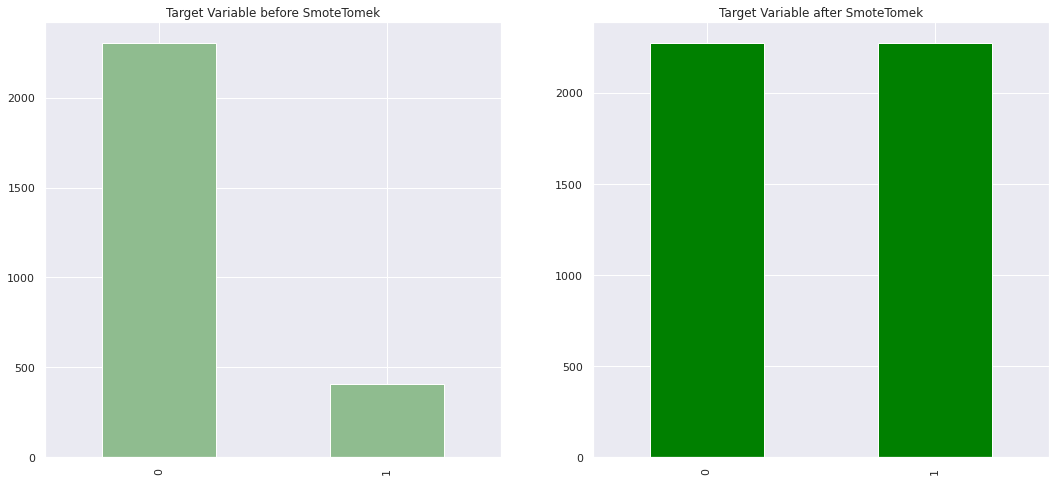

In [54]:
#Applying SmoteTomek and visualizing value counts of the target variable
fig,axes = plt.subplots(1,2, figsize = (18,8))

#Plotting value count of both classes before applying SmoteTomek
y_train.value_counts().plot(kind = 'bar',ax = axes[0] , title = 'Target Variable before SmoteTomek', color = 'darkseagreen')

#Fitting the predictor and target variable
X_smotetomek, y_smotetomek = SMOTETomek(random_state = 42).fit_resample(X_train, y_train)

#Plotting the value count of both classes after applying SmoteTomek
y_smotetomek.value_counts().plot(kind = 'bar',ax = axes[1] ,title = 'Target Variable after SmoteTomek' ,color = 'green')
plt.show()

In [55]:
#Checking value counts of target variable before and after handling the class imbalance
print('before handling class imbalance :')
print(y_train.value_counts())
print('\n')
print('after handling class imbalance :')
print(y_smotetomek.value_counts())

before handling class imbalance :
0    2303
1     409
Name: TenYearCHD, dtype: int64


after handling class imbalance :
0    2271
1    2271
Name: TenYearCHD, dtype: int64


**Observation**

We have successfully handled class imbalance, now the model will be able to learn from both classes without any bias.

### **Scaling the Data**

As we know that distance-based algorithms will get impacted if features are in different ranges, though the tree-based algorithm will not be affected by different ranges of features.

It is necessary to scale different features to a specific range so that the algorithm must not be biased towards the feature which has values with higher magnitude.

We Can use MinMaxScaler to scale down the features.

In [56]:
#Scaling the independent variables
scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_st_scale = scaler.fit_transform(X_smotetomek)
X_test_scale = scaler.transform(X_test)

In [57]:
#Converting the array to DataFrame
X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_st_scale  = pd.DataFrame(X_st_scale, columns = X_smotetomek.columns)
X_test_scale = pd.DataFrame(X_test_scale, columns = X_test.columns)

In [58]:
#Scaled train value
X_train_scale.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0.421053,0.000000,0.0,0.00,0.0,0.0,0.0,0.0
1,0.421053,0.000000,1.0,0.40,0.0,0.0,0.0,0.0
2,0.447368,0.333333,1.0,0.06,0.0,0.0,1.0,0.0
3,0.131579,0.000000,1.0,0.60,0.0,0.0,0.0,0.0
4,0.789474,0.666667,1.0,0.00,0.0,0.0,0.0,0.0


In [59]:
#Scaled SmoteTomek value
X_st_scale.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0.421053,0.000000,0.0,0.00,0.0,0.0,0.0,0.0
1,0.421053,0.000000,1.0,0.40,0.0,0.0,0.0,0.0
2,0.447368,0.333333,1.0,0.06,0.0,0.0,1.0,0.0
3,0.131579,0.000000,1.0,0.60,0.0,0.0,0.0,0.0
4,0.789474,0.666667,1.0,0.00,0.0,0.0,0.0,0.0


In [60]:
#Scaled test value
X_test_scale.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0.631579,0.333333,0.0,0.60,0.0,0.0,0.0,0.0
1,0.421053,0.000000,0.0,0.00,0.0,0.0,0.0,0.0
2,0.789474,0.000000,1.0,0.86,0.0,0.0,0.0,0.0
3,0.447368,1.000000,0.0,0.00,0.0,0.0,0.0,0.0
4,0.657895,0.333333,1.0,0.02,0.0,0.0,0.0,0.0


We have successfully scaled down the values using MinMaxScaler.

# **Machine Learning Model Implementation**

# **1. Logistic Regression**

Logistic Regression aims to measure the relationship between the categorical dependent variable and one or more independent variable (usually continuous) by plotting the dependent variables' probability score.

In [61]:
#Logistic Regression Algorithm
lr = LogisticRegression(fit_intercept  = True, random_state = 1, max_iter = 1000)

#Hyperparameter grid
grid = {'penalty' : ['l1', 'l2'],
         'C' : [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000 ]}

#Defining Scoring
scoring = make_scorer(f1_score, pos_label = 1)


#Using Gridsearch to find best parameters
lrg = GridSearchCV(lr, param_grid = grid, cv = 5, scoring = scoring )

#Training the classifier
lrg.fit(X_st_scale, y_smotetomek)

#Checking best parameters after applying gridsearch
lrg.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [62]:
#Creating a dataframe to store the results from Logistic Regression model
dict1 = {'Model' : ' Logistic Regression',
         'Accuracy Score' : round(accuracy_score(y_smotetomek, lrg.predict(X_st_scale)),2),
         'Precision Score' : round(precision_score(y_smotetomek, lrg.predict(X_st_scale)),2),
         'Recall Score' : round(recall_score(y_smotetomek, lrg.predict(X_st_scale)),2),
         'f1 Score' : round(f1_score(y_smotetomek, lrg.predict(X_st_scale)),2),
         'AUC Score' : round(roc_auc_score(y_smotetomek, lrg.predict_proba(X_st_scale)[:,1]),2)
       } 
Training_dataset = pd.DataFrame(dict1, index = [1])

dict2 = {'Model' : ' Logistic Regression ',
         'Accuracy Score' : round(accuracy_score(y_test, lrg.predict(X_test_scale)),2),
         'Precision Score' : round(precision_score(y_test, lrg.predict(X_test_scale)),2),
         'Recall Score' : round(recall_score(y_test, lrg.predict(X_test_scale)),2),
         'f1 Score' : round(f1_score(y_test, lrg.predict(X_test_scale)),2),
         'AUC Score' : round(roc_auc_score(y_test, lrg.predict_proba(X_test_scale)[:,1]),2)
       }

Test_dataset = pd.DataFrame(dict2, index = [1])

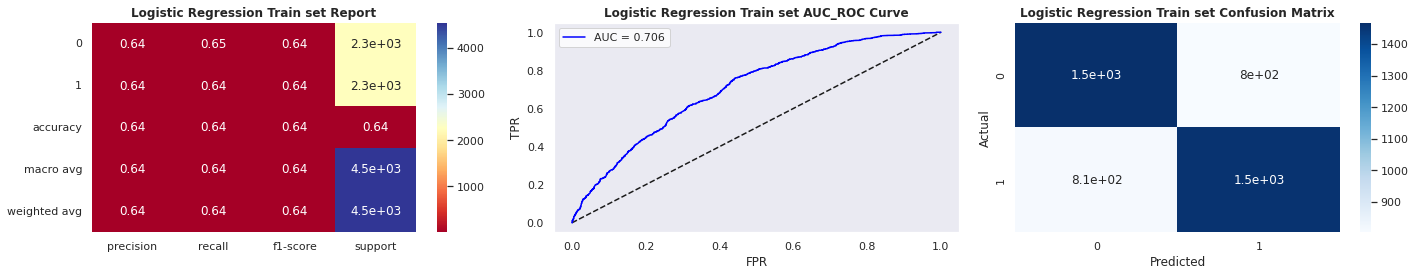

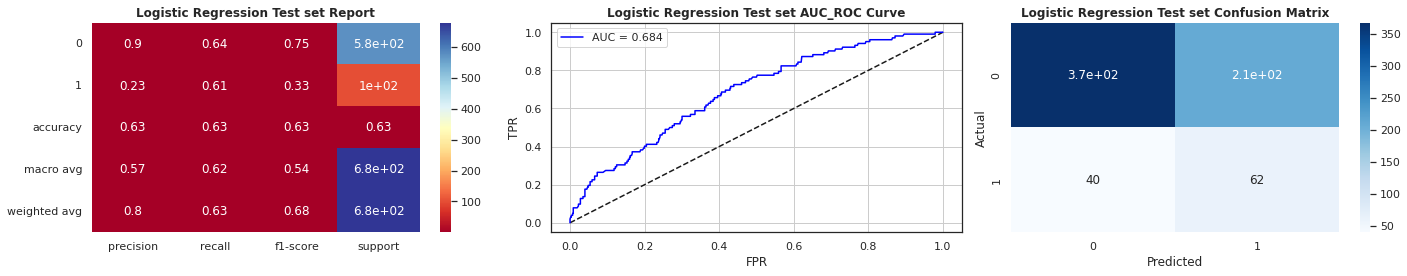

In [63]:
#Plotting the Evaluation Metrics for Logistic Regression model
for x , y_act, title in ((X_st_scale, y_smotetomek, 'Logistic Regression Train set'), (X_test_scale, y_test, 'Logistic Regression Test set')) :

#Predicting the target variable for both train and test set
    pred = lrg.predict(x)
    pred_proba = lrg.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y_act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(y_act, pred_proba)

#Classification report for both train and test set of data
    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.heatmap(report.T, annot=True, cmap = 'RdYlBu')
    plt.title(f'{title} Report', weight = 'bold')

#AUC_ROC Curve for both train and test set of data
    plt.subplot(1,3,2)
    sns.set_style ('white')
    plt.grid()
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}', color = 'blue')
    plt.legend(loc = 'upper left')
    plt.title(f'{title} AUC_ROC Curve', weight = 'bold')
    plt.xlabel('FPR')
    plt.ylabel('TPR')   
    
#Confusion Matrix for both train and test set of data
    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true=y_act, y_pred= pred), annot=True, cmap = 'Blues')
    plt.title(f'{title} Confusion Matrix', weight = 'bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()

plt.show()

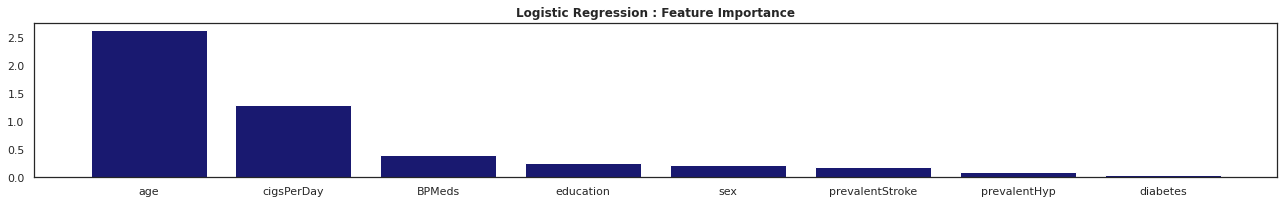

In [64]:
#Plotting feature importance for Logistic Regression model
importance = np.abs(lrg.best_estimator_.coef_[0])
index = np.argsort(importance)
index = index[::-1]
plt.figure(figsize=(18,3))

plt.bar(range(len(index)), importance[index], color = 'midnightblue')
plt.xticks(range(len(index)),[independent_variables[i] for i in index])
plt.title('Logistic Regression : Feature Importance', weight =  'bold')
plt.tight_layout()
plt.show()

# **2. Decision Tree Classifier**

Decision Tree is a supervised machine learning technique, it is a tree-structured classifier where internal nodes represent the features of the dataset, branches represent the decision rules and each leaf node represents the outcome. It is called a decision tree because similar to a tree, it starts with a root node, which expands on further branches and constructs a tree-like structure.

In [65]:
#Decision Tree model
dt = DecisionTreeClassifier(random_state = 2)

#Hyperparameter grid
grid1 = {'max_depth' : [4,6,8,10,12],
         'min_samples_split' : [50,60,70,80],
         'min_samples_leaf' :[40,45,50,55,60]}

#Defining Scoring
scoring = make_scorer(f1_score, pos_label = 1)

#Gridsearch to find best parameters
dtg = GridSearchCV(dt, param_grid = grid1, cv = 5, scoring = scoring )

#Training the classifier
dtg.fit(X_st_scale, y_smotetomek)

#Checking the best parameters after applying gridsearch
dtg.best_params_

{'max_depth': 4, 'min_samples_leaf': 55, 'min_samples_split': 50}

In [66]:
#Creating a dataframe to store the results from Decision Tree model
dict1 = {'Model' : ' Decision Tree ',
         'Accuracy Score' : round(accuracy_score(y_smotetomek, dtg.predict(X_st_scale)),2),
         'Precision Score' : round(precision_score(y_smotetomek, dtg.predict(X_st_scale)),2),
         'Recall Score' : round(recall_score(y_smotetomek, dtg.predict(X_st_scale)),2),
         'f1 Score' : round(f1_score(y_smotetomek, dtg.predict(X_st_scale)),2),
         'AUC Score' : round(roc_auc_score(y_smotetomek, dtg.predict_proba(X_st_scale)[:,1]),2)
       }

Training_dataset = Training_dataset.append(dict1, ignore_index=True)

dict2 = {'Model' : ' Decision Tree',
         'Accuracy Score' : round(accuracy_score(y_test, dtg.predict(X_test_scale)),2),
         'Precision Score' : round(precision_score(y_test, dtg.predict(X_test_scale)),2),
         'Recall Score' : round(recall_score(y_test, dtg.predict(X_test_scale)),2),
         'f1 Score' : round(f1_score(y_test, dtg.predict(X_test_scale)),2),
         'AUC Score' : round(roc_auc_score(y_test, dtg.predict_proba(X_test_scale)[:,1]),2)
       }

Test_dataset = Test_dataset.append(dict2, ignore_index=True)

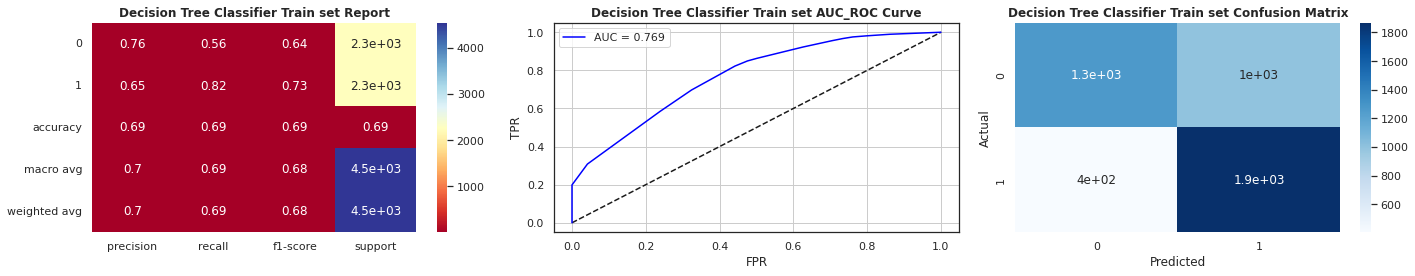

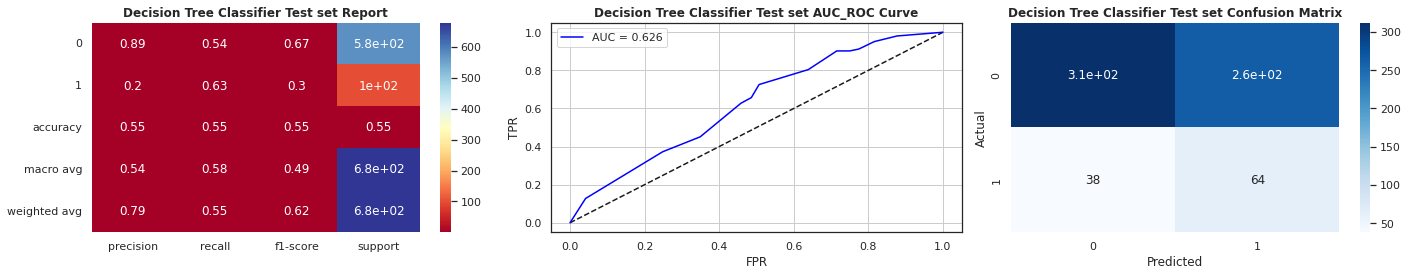

In [67]:
#Plotting the Evaluation Metrics for Decision Tree model
for x , y_act, title in ((X_st_scale, y_smotetomek, 'Decision Tree Classifier Train set'), (X_test_scale, y_test, 'Decision Tree Classifier Test set')) :

#Predicting the target variable for both train and test set
    pred = dtg.predict(x)
    pred_proba = dtg.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y_act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(y_act, pred_proba)

#Classification report for both train and test set of data
    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.heatmap(report.T, annot=True, cmap = 'RdYlBu')
    plt.title(f'{title} Report', weight = 'bold')

#AUC_ROC Curve for both train and test set of data
    plt.subplot(1,3,2)
    sns.set_style ('white')
    plt.grid()
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}', color = 'blue')
    plt.legend(loc = 'upper left')
    plt.title(f'{title} AUC_ROC Curve', weight = 'bold')
    plt.xlabel('FPR')
    plt.ylabel('TPR')   
    
#Confusion Matrix for both train and test set of data
    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true=y_act, y_pred= pred), annot=True, cmap = 'Blues')
    plt.title(f'{title} Confusion Matrix', weight = 'bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()

plt.show()

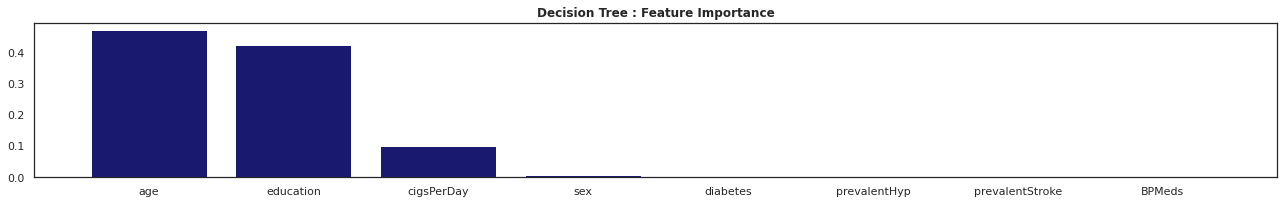

In [68]:
#Plotting feature importance for Decision Tree model
importance = np.abs(dtg.best_estimator_.feature_importances_)
index = np.argsort(importance)
index = index[::-1]
plt.figure(figsize=(18,3))
plt.bar(range(len(index)), importance[index], color = 'midnightblue')
plt.xticks(range(len(index)),[independent_variables[i] for i in index])
plt.title('Decision Tree : Feature Importance', weight =  'bold')
plt.tight_layout()
plt.show()

# **3. Random Forest Classifier**

Random Forest are a way of averaging multiple deep decision trees, trained on different parts of the same training set with a goal of reducing the variance but at an expense of a small increase in bias and some loss of interpretability, but generally greatly boosts the performance in the final model.

In [69]:
#Random Forest model
rf = RandomForestClassifier(random_state = 3)

#Hyperparameter grid
grid2 = {'n_estimators' : [100,125,150,200],
         'max_depth' : [4,6,8,10,12],
         'min_samples_split' : [50,60,70,80],
         'min_samples_leaf' : [45,50,55,60]}



#defining Scoring
scoring = make_scorer(f1_score, pos_label = 1)

#Gridsearch to find best parameters
rfg = GridSearchCV(rf, param_grid = grid2, cv = 5, scoring = scoring )

#Training the classifier
rfg.fit(X_st_scale, y_smotetomek)

#Checking the best parameters after applying gridsearch
rfg.best_params_

{'max_depth': 12,
 'min_samples_leaf': 45,
 'min_samples_split': 50,
 'n_estimators': 200}

In [70]:
#Creating a dataframe to store the results from Random Forest model
dict1 = {'Model' : ' Random Forest ',
         'Accuracy Score' : round(accuracy_score(y_smotetomek, rfg.predict(X_st_scale)),2),
         'Precision Score' : round(precision_score(y_smotetomek, rfg.predict(X_st_scale)),2),
         'Recall Score' : round(recall_score(y_smotetomek, rfg.predict(X_st_scale)),2),
         'f1 Score' : round(f1_score(y_smotetomek, rfg.predict(X_st_scale)),2),
         'AUC Score' : round(roc_auc_score(y_smotetomek, rfg.predict_proba(X_st_scale)[:,1]),2)
       }

Training_dataset = Training_dataset.append(dict1, ignore_index=True)

dict2 = {'Model' : ' Random Forest ',
         'Accuracy Score' : round(accuracy_score(y_test, rfg.predict(X_test_scale)),2),
         'Precision Score' : round(precision_score(y_test, rfg.predict(X_test_scale)),2),
         'Recall Score' : round(recall_score(y_test, rfg.predict(X_test_scale)),2),
         'f1 Score' : round(f1_score(y_test, rfg.predict(X_test_scale)),2),
         'AUC Score' : round(roc_auc_score(y_test, rfg.predict_proba(X_test_scale)[:,1]),2)
       }

Test_dataset = Test_dataset.append(dict2, ignore_index=True)

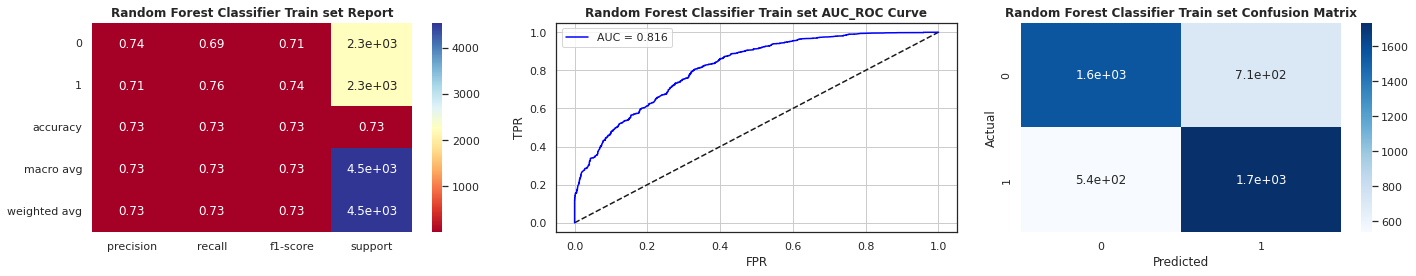

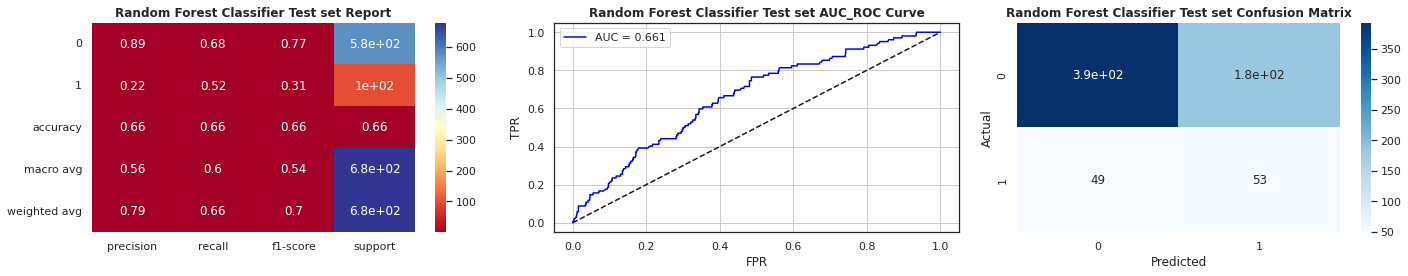

In [71]:
#Plotting the Evaluation Metrics for Random Forest model
for x , y_act, title in ((X_st_scale, y_smotetomek, 'Random Forest Classifier Train set'), (X_test_scale, y_test, 'Random Forest Classifier Test set')) :

#Predicting the target variable for both train and test set
    pred = rfg.predict(x)
    pred_proba = rfg.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y_act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(y_act, pred_proba)

#Classification report for both train and test set of data
    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.heatmap(report.T, annot=True, cmap = 'RdYlBu')
    plt.title(f'{title} Report', weight = 'bold')

#AUC_ROC Curve for both train and test set of data
    plt.subplot(1,3,2)
    sns.set_style ('white')
    plt.grid()
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}', color = 'blue')
    plt.legend(loc = 'upper left')
    plt.title(f'{title} AUC_ROC Curve', weight = 'bold')
    plt.xlabel('FPR')
    plt.ylabel('TPR')   
    
#Confusion Matrix for both train and test set of data
    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true=y_act, y_pred= pred), annot=True, cmap = 'Blues')
    plt.title(f'{title} Confusion Matrix', weight = 'bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()

plt.show()

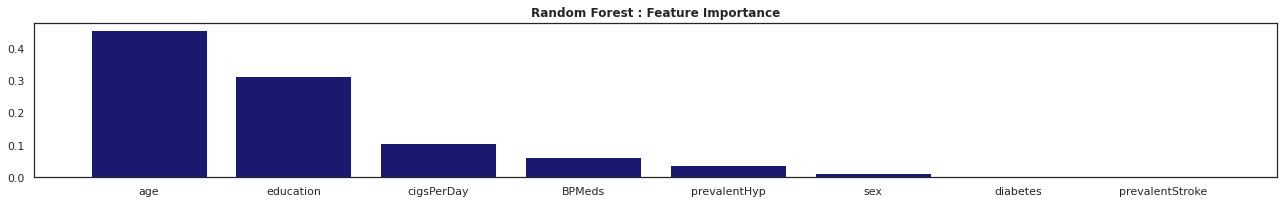

In [72]:
#Plotting feature importance for  model
importance = np.abs(rfg.best_estimator_.feature_importances_)
index = np.argsort(importance)
index = index[::-1]
plt.figure(figsize=(18,3))
plt.bar(range(len(index)), importance[index], color = 'midnightblue')
plt.xticks(range(len(index)),[independent_variables[i] for i in index])
plt.title('Random Forest : Feature Importance', weight =  'bold')
plt.tight_layout()
plt.show()